# **Splitters**
Efficiently divide large documents into manageable chunks for enhanced processing and analysis within the LangChain framework.



Once you've loaded documents, you'll often want to transform them to better suit your application. The simplest example is you may want to split a long document into smaller chunks that can fit into your model's context window. LangChain has a number of built-in document transformers that make it easy to split, combine, filter, and otherwise manipulate documents.

When you want to deal with long pieces of text, it is necessary to split up that text into chunks. As simple as this sounds, there is a lot of potential complexity here. Ideally, you want to keep the semantically related pieces of text together. What "semantically related" means could depend on the type of text. This notebook showcases several ways to do that.

At a high level, text splitters work as following:

Split the text up into small, semantically meaningful chunks (often sentences).
Start combining these small chunks into a larger chunk until you reach a certain size (as measured by some function).

Once you reach that size, make that chunk its own piece of text and then start creating a new chunk of text with some overlap (to keep context between chunks).
That means there are two different axes along which you can customize your text splitter:

1.   How the text is split
2.   How the chunk size is measured


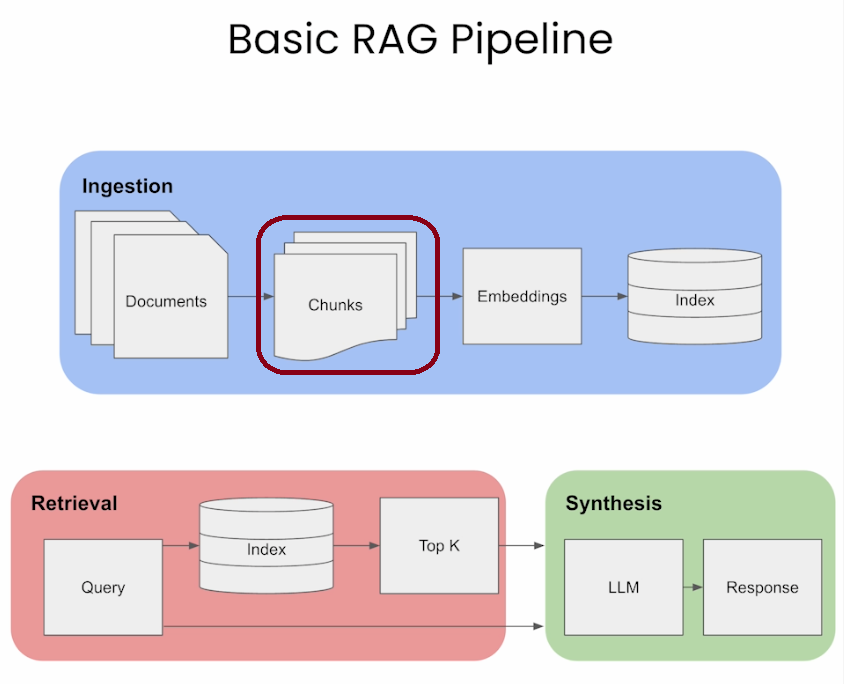

# **Types of Splitters**


## 1.   **Recursive**
    *   RecursiveCharacterTextSplitter
    *   RecursiveJsonSplitter


## 2.   **HTML**
    *   HTMLHeaderTextSplitter
    *   HTMLSectionSplitter

## 3.  **Markdown**
    *   MarkdownHeaderTextSplitter


## 4.   **Code**

## 5.   **Character**

## Types of Splitters:

* Recursive Splitters

 * RecursiveCharacterTextSplitter
 * RecursiveJsonSplitter

In [ ]:
!pip install openai langchain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

# **Importing the Packages for Splitters**

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

**Defining the chinks size**

In [ ]:
#do some experiemnts with different chunk size and overlap
chunk_size =26
chunk_overlap = 4

**Parameters in splitters**

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    # separators=["\n","\n\n"," ",""],
    chunk_overlap=chunk_overlap
)

c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    # separator="\n\n",
    chunk_overlap=chunk_overlap
)

**Splitters Example # 1**

Why doesn't this split the string below?

In [ ]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
text1

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [ ]:
c_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

Answer: because sting size is 26 and that's our chunk size as well

**Splitters example # 2**

In [ ]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [ ]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [ ]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefg']

**SpacyTextSplitter**

In [ ]:
%pip install --upgrade --quiet langchain-text-splitters tiktoken

In [ ]:
t = "LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. The project quickly garnered popularity,with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San Francisco and London. In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark."

In [ ]:
%pip install --upgrade --quiet  spacy

In [ ]:
from langchain_text_splitters import SpacyTextSplitter

text_splitter = SpacyTextSplitter(chunk_size=10, chunk_overlap=5)
texts = text_splitter.split_text(t)

In [ ]:
texts[0]

'LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence.'

**Pdf loading and splitting**

In [ ]:
!pip install pypdf langchain_community

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/National_AI_Policy_Consultation_Draft_1722220582 (1).pdf")
pages = loader.load_and_split()

In [ ]:
len(pages)

48

In [ ]:
pages[20]

Document(metadata={'source': '/content/National_AI_Policy_Consultation_Draft_1722220582 (1).pdf', 'page': 18}, page_content="4 \n National/Provincial IT Boards shall act as controlle rs and processors of such data while assisting \nthe concerned department(s) in secure and effective service provisioning.  \nVI. All such data shall be well backed up on the industry’s best practices and made available in a \ncontrolled environment to CoE -AI to acce ss and use to develop different AI algorithms for \ndata/system integrations and intelligent service offerings through prescribed processes with \nincremental value addition.  \nVII. Such AI algorithms shall be made available to the private sector entities for sector ial sandboxing \nand subsequent service provisioning while always remaining compliant with the sandbox and \navailable for system/service audit.  \nVIII. Smart city-based  projects are already in the deployment phase in several cities in Pakistan. CoE -\nAI shall support i n indi

In [ ]:
chunk_list=[]
for page in pages:
  chunks=r_splitter.split_text(page.page_content)
  for chunk in chunks:
    chunk_list.append(chunk)
print(len(chunk_list))


6068


In [ ]:
chunk_list[1000]

'collaboration with both'

## Embeddings

Embeddings are a type of dense vector representation used to capture the semantic meaning of words, phrases, sentences, or other types of data.

They are widely used in natural language processing (NLP) and other fields of machine learning to transform categorical data into numerical form, which is more suitable for computational models.

In [ ]:
!pip install transformers langchain_huggingface

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')

**Generate Embeddings**

In [ ]:
embed = embed_model.embed_query("how are you?")

In [ ]:
len(embed)

384

In [ ]:
embed

[-0.032435107976198196,
 -0.0597936175763607,
 0.03640249744057655,
 -0.02690996788442135,
 -0.023664157837629318,
 0.0064799170941114426,
 0.13852958381175995,
 0.03314033895730972,
 -0.0025555426254868507,
 0.002053880365565419,
 0.002857210813090205,
 -0.09473001956939697,
 0.05716606602072716,
 0.026267394423484802,
 0.06191154941916466,
 0.02362997643649578,
 0.04363710433244705,
 -0.12983234226703644,
 -0.14028264582157135,
 0.018216626718640327,
 -0.08630456775426865,
 -0.0006465298938564956,
 -0.03165007382631302,
 -0.043535783886909485,
 -0.0313156396150589,
 -0.002692107344046235,
 0.01964687556028366,
 -0.0047835404984653,
 -0.0530797615647316,
 0.0016580376541242003,
 -0.03713328018784523,
 0.0020965158473700285,
 0.04983419179916382,
 0.025686929002404213,
 0.02816847339272499,
 0.010682007297873497,
 -0.020910058170557022,
 0.0006300137611106038,
 -0.016448596492409706,
 0.006235387641936541,
 0.021730858832597733,
 -0.019932420924305916,
 -0.04406290128827095,
 -0.078797

In [ ]:
emb  = embed_model.embed_query(chunk_list[3])

In [ ]:
len(emb)

384

In [ ]:
emb

[-0.04944063723087311,
 -0.03099190816283226,
 0.008443611674010754,
 -0.04479697719216347,
 -0.007433648221194744,
 0.002795297419652343,
 0.029188761487603188,
 0.015950016677379608,
 0.05904020369052887,
 -0.01289352122694254,
 -0.01918356493115425,
 -0.030523229390382767,
 0.04391821101307869,
 0.04238738492131233,
 0.04120714217424393,
 0.027273261919617653,
 -0.025464996695518494,
 0.0253295861184597,
 -0.029229944571852684,
 -0.036136090755462646,
 0.0824563279747963,
 0.013694509863853455,
 -0.06247205287218094,
 -0.03913554549217224,
 -0.08964409679174423,
 0.04558462277054787,
 0.007550730369985104,
 -0.03636801242828369,
 -0.07338348031044006,
 -0.09941054880619049,
 0.0008804054232314229,
 -0.037293482571840286,
 0.10791090875864029,
 -0.020096272230148315,
 0.013301748782396317,
 0.028852025046944618,
 -0.001256314804777503,
 0.0545598603785038,
 -0.031657274812459946,
 0.03198304399847984,
 0.016082312911748886,
 -0.07365130633115768,
 0.00048241231706924736,
 -0.02458216

**OpenAI embedding model**

In [ ]:
from langchain_openai import OpenAIEmbeddings
embed_fn = OpenAIEmbeddings(model="text-embedding-3-small", api_key=os.getenv("OPENAI_API_KEY"))


In [ ]:
embed = embed_fn.embed_query("how are you?")

In [ ]:
!pip install langchain_experimental


## Semantic Splitters
Splits the text based on semantic similarity.

At a high level, this splits into sentences, then groups into groups of 3 sentences, and then merges one that are similar in the embedding space.

In [ ]:
from langchain_experimental.text_splitter import SemanticChunker

In [ ]:
!pip install --quiet langchain_experimental langchain_openai

In [ ]:
text_splitter = SemanticChunker(
    embed_model, breakpoint_threshold_type="percentile"
)

In [ ]:
t

"LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. The project quickly garnered popularity,with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San Francisco and London. In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark."

In [ ]:
sementic_splits = text_splitter.split_text(t)

In [ ]:
len(sementic_splits)

2

In [ ]:
sementic_splits[0]

"LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. The project quickly garnered popularity,with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San Francisco and London."

In [ ]:
sementic_splits[1]

'In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark.'

In [ ]:
sementic_embed = embed_model.embed_query(sementic_splits[0])

In [ ]:
sementic_embed

[-0.056384772062301636,
 -0.05346721038222313,
 -0.06954142451286316,
 -0.014295429922640324,
 0.009370651096105576,
 -0.012697918340563774,
 -0.0399722196161747,
 0.0037890539970248938,
 -0.01568087749183178,
 -0.045515622943639755,
 0.03538503870368004,
 -0.02254604734480381,
 0.012733331881463528,
 0.038737863302230835,
 0.00894478801637888,
 0.007724675815552473,
 -0.034105803817510605,
 -0.07874759286642075,
 0.07949928939342499,
 -0.010543032549321651,
 0.02872416377067566,
 -0.01928829401731491,
 -0.007689712103456259,
 -0.06615587323904037,
 0.040227118879556656,
 0.08610332757234573,
 0.05861762538552284,
 -0.07170010358095169,
 0.012730331160128117,
 -0.18944039940834045,
 0.006675488315522671,
 -0.006620675791054964,
 0.04715737700462341,
 -0.039194852113723755,
 -0.0177360437810421,
 0.05460413917899132,
 -0.03216157853603363,
 0.01922684907913208,
 -0.009782016277313232,
 0.01933376118540764,
 -0.009136327542364597,
 -0.021263591945171356,
 0.01575329340994358,
 -0.0377368

In [ ]:
len(sementic_embed)

384